{('A', 'B'): Text(0.14789080147870615, -0.7053125435778703, '2'),
 ('A', 'C'): Text(0.6053978915694864, 0.10123606699872179, '3'),
 ('A', 'D'): Text(0.20563677345610298, -0.01026557881813761, '4'),
 ('A', 'E'): Text(0.7973772276999285, -0.17346247014794705, '5'),
 ('A', 'F'): Text(0.5734151644256614, -0.6204595899561148, '6'),
 ('A', 'X'): Text(0.21417513701448815, -0.33326397589545026, '8'),
 ('A', 'Y'): Text(0.39304750608601885, -0.4436918056002951, '9'),
 ('A', 'Z'): Text(0.6486591353013735, -0.35625338413418783, '10'),
 ('B', 'C'): Text(-0.24671130695180743, 0.06515658164287352, '5'),
 ('B', 'D'): Text(-0.6464724250651909, -0.04634506417398587, '6'),
 ('B', 'E'): Text(-0.05473197082136533, -0.2095419555037953, '7'),
 ('B', 'F'): Text(-0.2786940340956324, -0.6565390753119631, '8'),
 ('B', 'G'): Text(-0.43770883555305967, -0.1715384371126564, '9'),
 ('B', 'X'): Text(-0.6379340615068056, -0.3693434612512985, '10'),
 ('B', 'Y'): Text(-0.459061692435275, -0.47977129095614335, '11'),
 ('

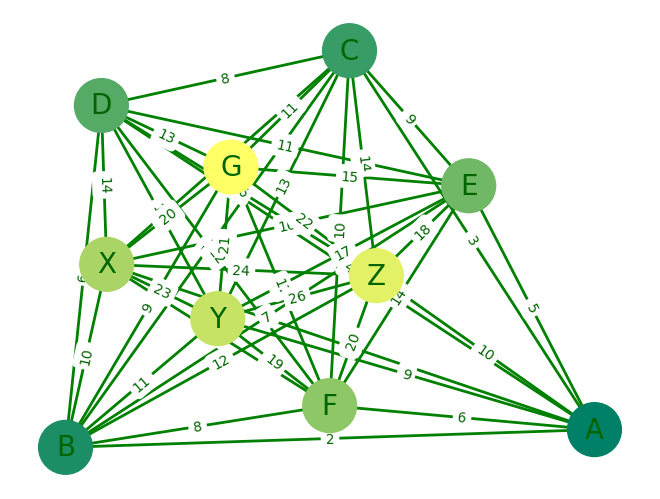

In [1]:
#p229278 
import numpy as np 
import pandas as pd 
import networkx as nx 
from matplotlib.cm import summer


G = nx.Graph()
df = pd.read_csv('sh_graph.csv')
G.add_weighted_edges_from(df.values)

# spring_layout is used to position the nodes 
pos = nx.spring_layout(G)


nx.draw(G, pos, with_labels=True, node_color=range(10), node_size=1500, cmap= summer, edge_color='green',width =2, linewidths=1, font_size=20, font_color='darkgreen')
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_color='darkgreen', font_size=10)



In [4]:
from collections import deque

def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])

    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path
        visited.add(node)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                

In [5]:
def dfs(graph, start, goal):
    visited = set()

    def dfs_recursive(node, path):
        if node == goal:
            return path
        visited.add(node)

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_path = dfs_recursive(neighbor, path + [neighbor])
                if new_path:
                    return new_path
        return None

    return dfs_recursive(start, [start])

In [6]:
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def best_first_search(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((heuristic[start], [start]))  # Initial state

    while not pri_queue.empty():
        heruistic_current, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                pri_queue.put((heuristic[neighbor], new_path))

    return []  # Goal not found


In [7]:

start_node = input("Enter the start node: ")
goal_node = input("Enter the goal node: ")
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}
choice = 0

while choice != 4:
    print("\n1. BFS")
    print("2. DFS")
    print("3. Best-First Search")
    print("4. Exit")
    choice = int(input("Enter your choice: "))

    if choice == 1:
        
        algo = bfs(G, start_node, goal_node)
        if algo:
            print("BFS Path from", start_node, "to", goal_node, ":", algo)
            print("Nodes Traced by BFS: ", len(algo) - 1)
        else:
            print("No path found")
        
    elif choice == 2:
        algo = dfs(G, start_node, goal_node)
        if algo:
            print("DFS Path from", start_node, "to", goal_node, ":", algo)
            print("Nodes Traced by DFS: ", len(algo) - 1)
        else:
            print("No path found")
    elif choice == 3:
        algo = best_first_search(G, start_node, goal_node, heuristic)
        if algo:
            print("Best-First Search Path from", start_node, "to", goal_node, ":", algo)
            print("Nodes Traced by Best-First Search: ", len(algo) - 1)
        else:
            print("No path found")
    elif choice == 4:
        print("Exiting...")
    else:
        print("Invalid choice. Try again.")








1. BFS
2. DFS
3. Best-First Search
4. Exit
BFS Path from A to G : ['A', 'B', 'G']
Nodes Traced by BFS:  2

1. BFS
2. DFS
3. Best-First Search
4. Exit
DFS Path from A to G : ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Nodes Traced by DFS:  6

1. BFS
2. DFS
3. Best-First Search
4. Exit
Best-First Search Path from A to G : ['A', 'Y', 'G']
Nodes Traced by Best-First Search:  2

1. BFS
2. DFS
3. Best-First Search
4. Exit
Exiting...
